# $\varepsilon$-Outage Capacity of Rayleigh Fading Channels

_Author:_ Karl-Ludwig Besser, Technische Universität Braunschweig

This notebook is part of the paper "Reliability Bounds for Dependent Fading Wireless Channels", K.-L. Besser and E. Jorswieck, IEEE Transactions on Wireless Communications, 2020 ([arXiv:1909.01415[cs.IT]](https://arxiv.org/abs/1909.01415), [DOI:10.1109/TWC.2020.2997332](https://doi.org/10.1109/TWC.2020.2997332)).  
If you use any of this work, please cite the above paper.

> If you are not familiar with Jupyter notebooks: The easiest way to use this notebook interactively, is to hit `Kernel --> Restart & Run All` in the menu. The will execute all cells and enable the interactive elements of the plots.  
> Alternatively, you can execute the cells one by one using Shift+Return

## Introduction

In this notebook, the worst-case and best-case $\varepsilon$-capacities for Rayleigh fading channels are shown. In addition, the $\varepsilon$-capacities for independent and comonotonic fading coefficients are given.

The $\varepsilon$-capacity is defined as
$$R^{\varepsilon}=\sup\left\{R: \Pr\left(X_1+X_2+\dots+X_n < \frac{2^R-1}{\rho}\right) < \varepsilon\right\},$$
where $\rho$ is the SNR.  
In the case of Rayleigh fading, all $\left|h_i\right|^2 = X_i$ are exponentially distributed, i.e., $\left|h_i\right|^2\sim\exp(1)$.


The final expression for the worst-case $\varepsilon$-capacity is given by
$$\underline{R}^{\varepsilon}(\rho) = \log_2\left(1-\rho \cdot \phi_{-}(1-\varepsilon)\right).$$
Please refer to the paper for details.  
An interactive overview of the actual calculations can be found in the Jupyter notebook [Worst-Case Epsilon-Outage Capacity of Rayleigh Fading Channels](worst-case-epsilon-outage-rayleigh.ipynb).


The best-case $\varepsilon$-capacity is given by a similar expression as
$$\overline{R}^{\varepsilon}(\rho) = \log_2\left(1-\rho \cdot \phi(\varepsilon)\right).$$
Please refer to the paper for details ([arXiv:1909.01415[cs.IT]](https://arxiv.org/abs/1909.01415), [DOI:10.1109/TWC.2020.2997332](https://doi.org/10.1109/TWC.2020.2997332)).  
An interactive overview of the actual calculations can be found in the Jupyter notebook [Best-Case Epsilon-Outage Capacity of Rayleigh Fading Channels](best-case-epsilon-outage-rayleigh.ipynb).

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interact

## Needed Functions

In [2]:
from best_case_rayleigh import best_case_rate
from worst_case_rayleigh import worst_case_rate

In [3]:
from scipy.special import gammaincinv

def iid_case_rate(eps, snr, n):
    return np.log2(1. + snr*gammaincinv(n, eps))

def comonotonic_case_rate(eps, snr, n):
    return np.log2(1. - snr*n*np.log(1-eps))

In [4]:
def calc_rates(eps, snr_db, n):
    snr = 10**(snr_db/10.)
    rates = {}
    rates['Best Case'] = [best_case_rate(_eps, snr, n) for _eps in eps]
    rates['Worst Case'] = [worst_case_rate(_eps, snr, n) for _eps in eps]
    rates['IID Case'] = iid_case_rate(eps, snr, n)
    rates['Comonotonic'] = comonotonic_case_rate(eps, snr, n)
    return rates

## Plot

<IPython.core.display.Javascript object>


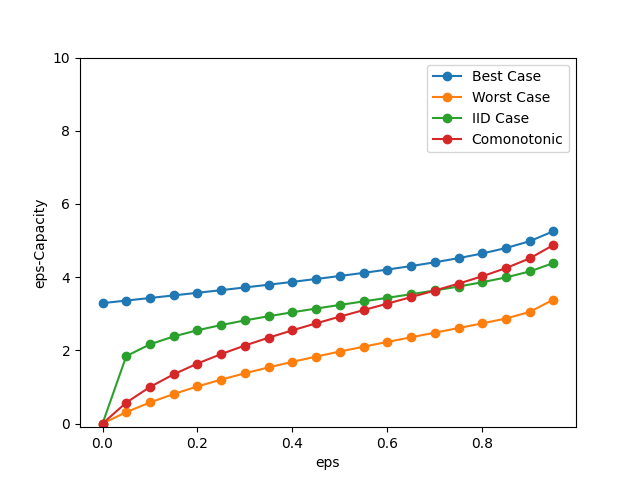

interactive(children=(IntSlider(value=3, description='n', max=10, min=3), FloatSlider(value=5.0, description='…

In [5]:
def outage_rate_plot(snr_init=5, n_init=5):
    fig, ax = plt.subplots(num="Eps-Outage Capacity of Rayleigh Fading Channels")
    ax.set_ylabel("eps-Capacity")
    ax.set_xlabel("eps")
    ax.set_ylim([-.1, 10])
    eps = np.arange(0, 1, .05)
    plots = {}
    _rates = calc_rates(eps, snr_init, n_init)
    for _label, _data in _rates.items():
        plots[_label] = ax.plot(eps, _data, 'o-', label=_label)[0]
    
    def update_plot(n=0, snr_db=5):
        _rates = calc_rates(eps, snr_db, n)
        for _label, _data in _rates.items():
            plots[_label].set_ydata(_data)
        fig.canvas.draw_idle()

    interact(update_plot, n=(3, 10, 1), snr_db=(0, 10, .5))
    ax.legend()

outage_rate_plot()

# Zero-Outage Capacity With Perfect CSI

A special case of the $\varepsilon$-outage capacity is the zero-outage capacity, i.e., $\varepsilon=0$.

In the following, we will show bounds on the zero-outage capacity with the *additional assumption of perfect CSI at the transmitter*.

In [6]:
from scipy import integrate
from best_case_rayleigh import determine_cmin, H

def iid_zero_out_perf_csi(n, snr):
    #snr = 10**(snr_db/10.)
    return np.log2(1 + snr*(n-1))

def _integral_best_zero_out(c, n):
    """Integral \int_{1-c}^{1} 1/H(1-x) dx"""
    result = integrate.quad(lambda x: 1./H(1-x, n, 0), 1-c, 1)
    return result[0]

def best_zero_out_perf_csi(n, snr):
    #snr = 10**(snr_db/10.)
    cn = np.array([determine_cmin(_n, 0) for _n in n])
    _integral = np.array([_integral_best_zero_out(_c, _n) for _c, _n in zip(cn, n)])
    denom = 1 - n*cn + H(cn, n, 0)*n*_integral
    return np.log2(1 + snr*H(cn, n, 0)/denom)

def calc_zero_out_cap(n, snr_db):
    snr = 10**(snr_db/10.)
    results = {}
    results['Best Case CSI-R'] = [best_case_rate(0, snr, _n) for _n in n]
    results['Best Case CSI-TR'] = best_zero_out_perf_csi(n, snr)
    results['Iid Case CSI-TR'] = iid_zero_out_perf_csi(n, snr)
    return results

## Plot

The following plot shows the zero-outage capacities for the following scenarios:
* Perfect CSI-TR: Best Case
* Perfect CSI-R: Best Case
* Perfect CSI-TR: Iid Case

It should be noted that the iid case with only CSI-R is zero. Therefore, only the best case CSI-R is shown.


The following can be observed:
* Perfect CSI-T increases the zero-outage capacity in the iid case to positive values
* Perfect CSI-T increases the zero-outage capacity in the best case
* However, the increase in the best case vanishes for increasing $n$


<IPython.core.display.Javascript object>


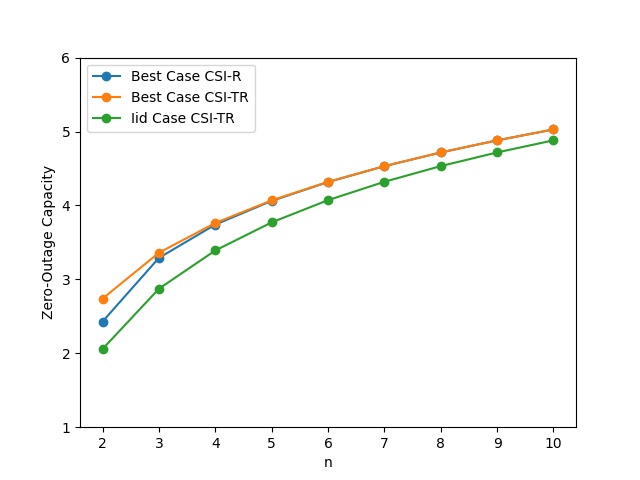

interactive(children=(FloatSlider(value=5.0, description='snr_db', max=10.0, step=0.5), Output()), _dom_classe…

In [7]:
def zero_outage_perfect_csi_plot(snr_init=5):
    fig, ax = plt.subplots(num="Zero-Outage Capacity of Rayleigh Fading Channels with Perfect CSI")
    ax.set_ylabel("Zero-Outage Capacity")
    ax.set_xlabel("n")
    ax.set_ylim([1, 6])
    n = np.arange(2, 11)
    plots = {}
    _rates = calc_zero_out_cap(n, snr_init)
    for _label, _data in _rates.items():
        plots[_label] = ax.plot(n, _data, 'o-', label=_label)[0]
    
    def update_plot(snr_db=5):
        _rates = calc_zero_out_cap(n, snr_db)
        for _label, _data in _rates.items():
            plots[_label].set_ydata(_data)
        fig.canvas.draw_idle()

    interact(update_plot, snr_db=(0, 10, .5))
    ax.legend()

zero_outage_perfect_csi_plot()